In [1]:
from __future__ import print_function
import SimpleITK as sitk
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
reader = sitk.ImageSeriesReader()

In [2]:
"""Defining the start of the path name to where my files are (this depends on your path and the
   naming scheme you used when using dicomsort.py)"""
directory = '/Volumes/Extreme_SSD/MPhys/TCIA_Data/NSCLC-Radiomics/NSCLC_Sorted/LUNG1-'


"""defining the number of iterations the for loop will perform. +1 is due to the range function"""
number_of_iterations = 422+1 #I want to make this so that the program can read the number of series in the chosen directory




In [5]:
counter = 0
sizes = []
biggest_size = 0
biggest_size_label = 0
too_big_sizes = []
too_big_indexes = []
for x in range(1, number_of_iterations) :
    _3_digit_x = '{0:03}'.format(x) #formats the 'x' to the form 'yzx' e.g. 1 -> 001
                                    # so that it fits the format of the naming scheme used
                                    # e.g. LUNG1-001-CTUnknownStudyID
    directory_full = directory + str(_3_digit_x) + '-CT' #   This line will change depending on the naming scheme that you have used
    dicom_names = reader.GetGDCMSeriesFileNames(directory_full)
    reader.SetFileNames(dicom_names)
    image = reader.Execute()
    size = image.GetSize()
    sizes.append(size[2])
    #counter += 1
    
    if size[2] > 170 :
        too_big_sizes.append(size[2])
        too_big_indexes.append(x)
        print(f"Number of slices in LUNG1-{_3_digit_x} = {size[2]}")
    #if counter%20 == 0 :
        #print(counter) # Checking that the code is running and its progress

biggest_size = np.max(sizes)
biggest_size_label = np.argmax(sizes) + 1
print(too_big_sizes)
print(too_big_indexes)

ImageSeriesReader (0x7f92ba9da0d0): Non uniform sampling or missing slices detected,  maximum nonuniformity:2.44186

ImageSeriesReader (0x7f92b85e9960): Non uniform sampling or missing slices detected,  maximum nonuniformity:2.98469



Number of slices in LUNG1-021 = 197
Number of slices in LUNG1-038 = 176
Number of slices in LUNG1-058 = 297
Number of slices in LUNG1-067 = 176
Number of slices in LUNG1-073 = 176
Number of slices in LUNG1-075 = 176
Number of slices in LUNG1-082 = 176


ImageSeriesReader (0x7f92b85e9960): Non uniform sampling or missing slices detected,  maximum nonuniformity:2.71429



Number of slices in LUNG1-086 = 176
Number of slices in LUNG1-093 = 176


ImageSeriesReader (0x7f92ba9da0d0): Non uniform sampling or missing slices detected,  maximum nonuniformity:1.9717



Number of slices in LUNG1-096 = 176
Number of slices in LUNG1-104 = 297
Number of slices in LUNG1-108 = 176
Number of slices in LUNG1-110 = 176
Number of slices in LUNG1-111 = 216
Number of slices in LUNG1-112 = 176
Number of slices in LUNG1-133 = 184


ImageSeriesReader (0x7f92b85e9960): Non uniform sampling or missing slices detected,  maximum nonuniformity:2.97619



Number of slices in LUNG1-371 = 173
[197, 176, 297, 176, 176, 176, 176, 176, 176, 176, 297, 176, 176, 216, 176, 184, 173]
[21, 38, 58, 67, 73, 75, 82, 86, 93, 96, 104, 108, 110, 111, 112, 133, 371]


The largest depth in the NSCLC-Radiomics data set is 297 from LUNG1-058


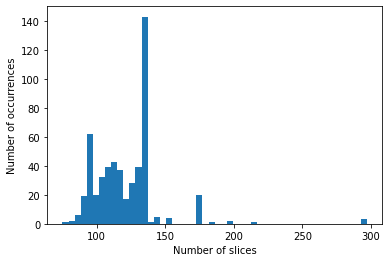

In [8]:
print("The largest depth in the NSCLC-Radiomics data set is " + str(biggest_size) + " from LUNG1-" + str('{0:03}'.format(biggest_size_label)))

plt.hist(sizes, bins = 50)
plt.xlabel("Number of slices")
plt.ylabel("Number of occurrences")
plt.show()

[370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387
 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405
 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 1